<a href="https://colab.research.google.com/github/Hans0124SG/GSC-2020-NLP-tutorial/blob/main/GSC_2020_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applying Natural Language Processing (NLP) in Public Health - spaCy Hands-On

spaCy offers many pre-trained models in different languages and domains, and we can directly use them without having access to the original rich data and spend the time training, especially if we don't have the know-how.

General domain models in different languages: https://spacy.io/usage/models

Biomedical domain models: https://allenai.github.io/scispacy/

Here we use the model `en_core_sci_md`, which is a full spaCy pipeline pre-trained model with medium size vocabulary and 50k word vectors.

In [1]:
# Download and install the pre-trained model
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.3.0/en_core_sci_md-0.3.0.tar.gz

     |████████████████████████████████| 79.9MB 60kB/s 
     |████████████████████████████████| 10.4MB 11.7MB/s 
     |████████████████████████████████| 1.1MB 46.3MB/s 
  Created wheel for en-core-sci-md: filename=en_core_sci_md-0.3.0-cp36-none-any.whl size=79931146 sha256=a70baeb3efe6e1874905b493f8acbbce606024f84586a5ace3836320c24b9768
  Stored in directory: /root/.cache/pip/wheels/7e/1b/90/364b1e3c8f8c21241876892748fd737a6b3698f2632a9429ac
Successfully built en-core-sci-md
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


Restart the runtime for Colab to recognize the pre-trained model

In [1]:
import spacy
nlp = spacy.load("en_core_sci_md")

In [2]:
doc = nlp('Long-term severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) shedding was observed from the upper respiratory tract of a female immunocompromised individual with chronic lymphocytic leukemia and acquired hypogammaglobulinemia.')

When you call nlp on a text, spaCy first tokenizes the text to produce a `Doc` object. The `Doc` is then processed in several different steps – this is also referred to as the **processing pipeline**. The pipeline used by the default models consists of a tagger, a parser and an entity recognizer. Each pipeline component returns the processed `Doc`, which is then passed on to the next component.

![Alt text](https://spacy.io/pipeline-7a14d4edd18f3edfee8f34393bff2992.svg)

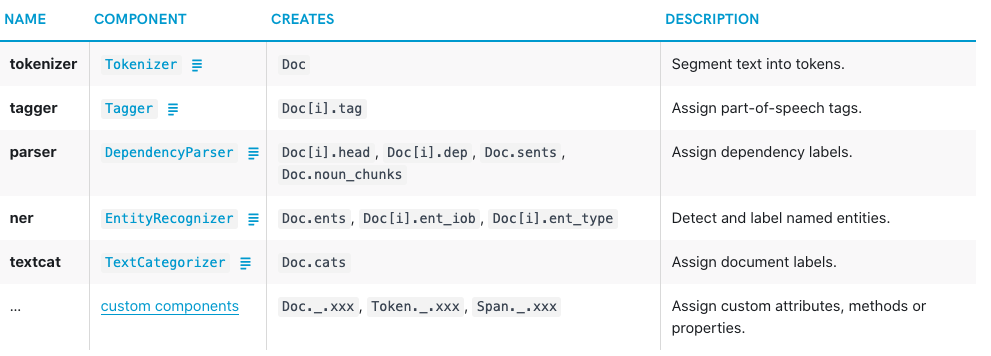


In [12]:
# let's look at some attributes of the tokens recognized by the model
attributes = {}
attributes['token'] = []
attributes['lemma'] = []
attributes['pos_'] = []
attributes['tag_'] = []
attributes['dep_'] = []
attributes['shape_'] = []
attributes['is_alpha'] = []
attributes['is_stop'] = []
for token in doc:
  attributes['token'].append(token.text)
  attributes['lemma'].append(token.lemma_)
  attributes['pos_'].append(token.pos_)
  attributes['tag_'].append(token.tag_)
  attributes['dep_'].append(token.dep_)
  attributes['shape_'].append(token.shape_)
  attributes['is_alpha'].append(token.is_alpha)
  attributes['is_stop'].append(token.is_stop)

In [14]:
import pandas as pd
pd.DataFrame(attributes)

,token,lemma,pos_,tag_,dep_,shape_,is_alpha,is_stop
0,Long-term,long-term,ADJ,JJ,amod,Xxxx-xxxx,False,False
1,severe,severe,ADJ,JJ,amod,xxxx,True,False
2,acute,acute,ADJ,JJ,amod,xxxx,True,False
3,respiratory,respiratory,ADJ,JJ,amod,xxxx,True,False
4,syndrome,syndrome,NOUN,NN,compound,xxxx,True,False
5,coronavirus,coronavirus,NOUN,NN,compound,xxxx,True,False
6,2,2,NUM,CD,nummod,d,False,False
7,(,(,PUNCT,-LRB-,punct,(,False,False
8,SARS-CoV-2,sars-cov-2,NOUN,NN,appos,XXXX-XxX-d,False,False
9,),),PUNCT,-RRB-,punct,),False,False


In [4]:
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Long-term 0 9 ENTITY
severe 10 16 ENTITY
acute respiratory syndrome coronavirus 2 17 57 ENTITY
SARS-CoV-2 59 69 ENTITY
shedding 71 79 ENTITY
upper respiratory tract 102 125 ENTITY
female 131 137 ENTITY
immunocompromised 138 155 ENTITY
individual 156 166 ENTITY
chronic lymphocytic leukemia 172 200 ENTITY
hypogammaglobulinemia 214 235 ENTITY


In [10]:
from spacy import displacy
from IPython.core.display import display, HTML

In [11]:
html = displacy.render(doc, style="ent")
display(HTML(html))